# Compression testing for MDF cores

In [3]:
### DEPENDENCIES
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
def makeDataframe(csvPath):
    df = pd.read_csv(csvPath)
    df = df[1:]
    return df

In [5]:
def graphDataframe(df):
    
    ext = df['Extension']
    load = df['Load']

    ext = [float(x) for x in ext]
    load = [float(y) for y in load]
    fig = plt.figure()
    
    fig.set_size_inches(10,10)  # OR
    plt.scatter(ext, load)

    fig.suptitle('Extension vs. Load', fontsize=20)
    plt.xlabel('Compressive Extension (mm)', fontsize=16)
    plt.ylabel('Compressive Load (N)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()

def toFloat(x):
    return float(x)

def seaborn(df):
    ext = df['Extension'].apply(toFloat)
    load = df['Load'].apply(toFloat)
        
    sns.jointplot(ext,load)
    
def opposite(x):
    return -float(x)

def rotateGraph(df):
    """Returns opposites of values so graphs are correct with values"""    
    df['Extension'] = df['Extension'].apply(opposite)
    df['Load'] = df['Load'].apply(opposite)

    return df
    
# df = makeDataframe('./data/CompressionCore/Core25-15.csv')
# df = rotateGraph(df)
# seaborn(df)
# graphDataframe(df)

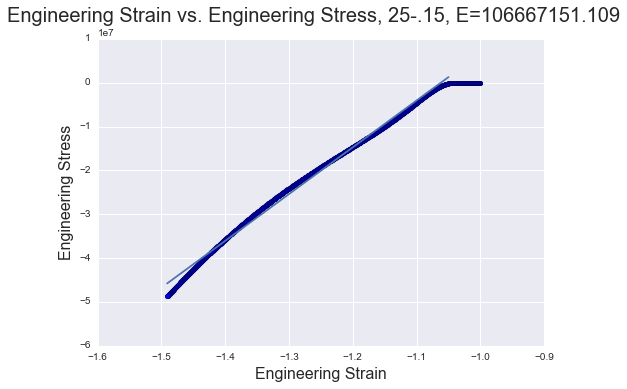

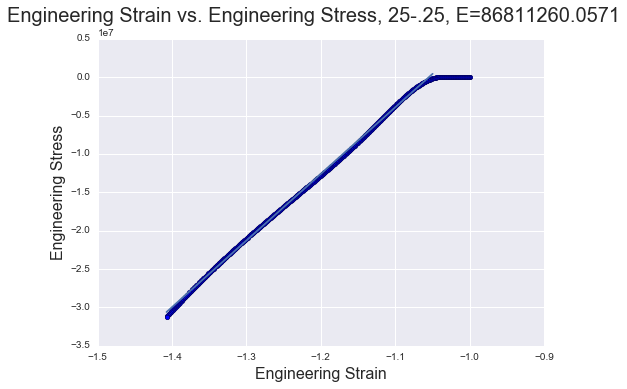

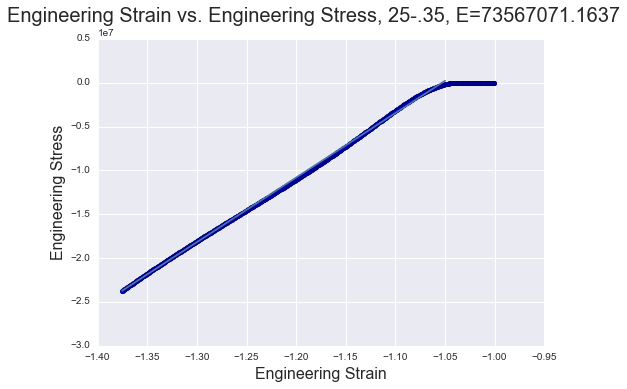

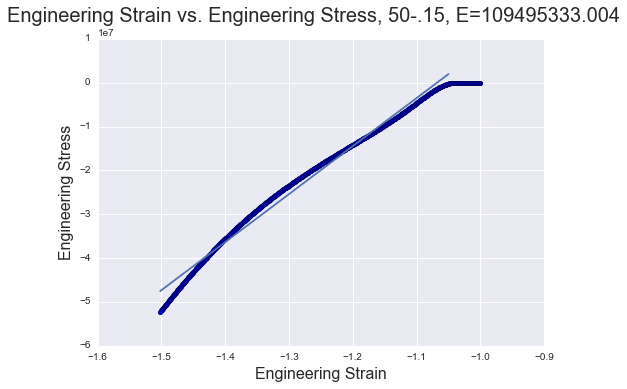

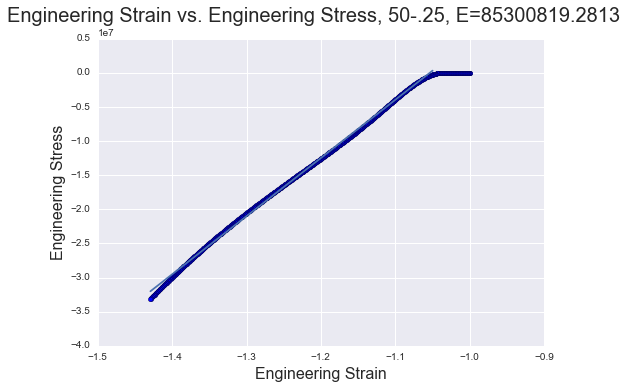

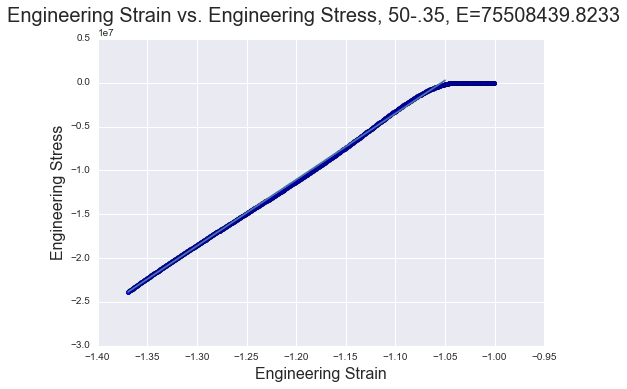

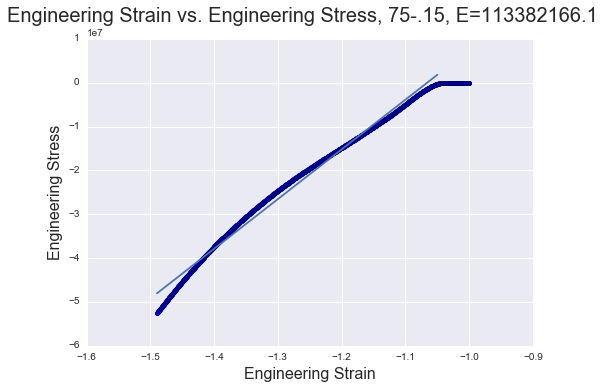

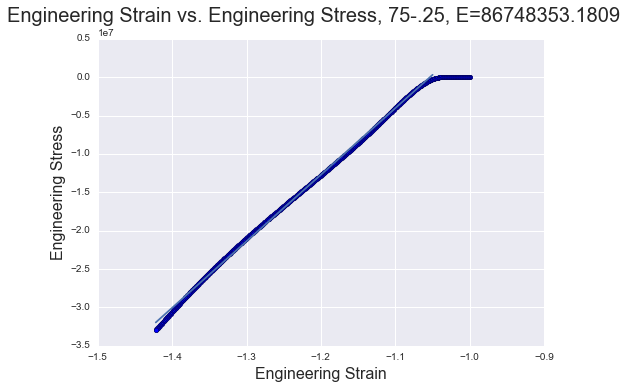

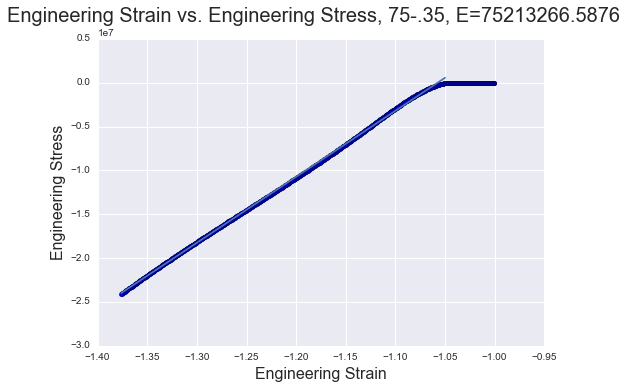

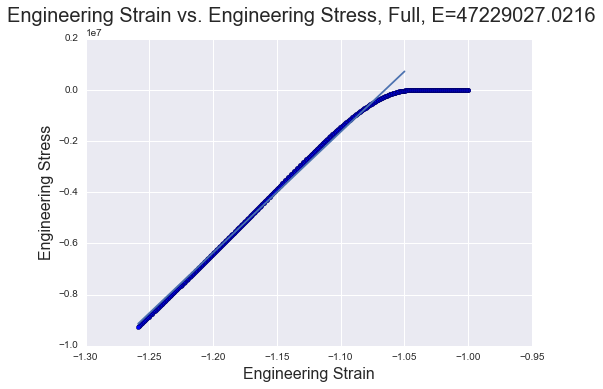

{'75-15': 113382166.0999586, '50-15': 109495333.0043173, '50-25': 85300819.281253427, '25-15': 106667151.10886323, '50-35': 75508439.823266998, '25-25': 86811260.057147905, '25-35': 73567071.163706273, 'Full': 47229027.02160766, '75-35': 75213266.587565303, '75-25': 86748353.180897489}


In [10]:
def engineeringStrain(extensions, length): # UNITLESS... everything in mm
    epsilon = []
    for extension in extensions:
        epsilon.append((extension - length)/length)
    return epsilon

def engineeringStress(loads, area):
    sigma = []
    for load in loads:
        sigma.append(load/area)
    return sigma

def graphStressStrain(df, length, area, sample, estimate=-1.05):
    
    extensions = df['Extension']
    loads = df['Load']

    extensions = [float(x) for x in extensions]
    loads = [float(y) for y in loads]
    
    mmarea = sqINtosqMM(area)
    marea = mmarea / 1000000
    strains = engineeringStrain(extensions, length)
    stresses = engineeringStress(loads, marea)
    
    chopPoint = chopData(strains, estimate)
    
    modStrains = strains[chopPoint:]
    modStresses = stresses[chopPoint:]
    modStrains = np.array(modStrains)
    modStresses = np.array(modStresses)
    
    fig, ax = plt.subplots()
    fit = np.polyfit(modStrains, modStresses, deg=1)
    compressionModulus = fit[0]
    ax.plot(modStrains, fit[0]*modStrains + fit[1])
    ax.scatter(strains, stresses)

    fig.suptitle('Engineering Strain vs. Engineering Stress, {}, E={}'.format(sample, compressionModulus), fontsize=20)
    plt.xlabel('Engineering Strain', fontsize=16)
    plt.ylabel('Engineering Stress', fontsize=16)

    plt.show()
    return compressionModulus

def chopData(dataList, estimate):
    for data in dataList[::-1]:
        if data < estimate:
            continue
        else:
            return dataList.index(data)

        
def sqINtosqMM(inches):
    return 645.16*inches

thickness = 6.35
    
moduli = {}
s25_15 = makeDataframe('./data/CompressionCore/Core25-15.csv')
moduli["25-15"] = graphStressStrain(s25_15, thickness, 3.1793, "25-.15")
s25_25 = makeDataframe('./data/CompressionCore/Core25-25.csv')
moduli["25-25"] = graphStressStrain(s25_25, thickness, 4.9657, "25-.25")
s25_35 = makeDataframe('./data/CompressionCore/Core25-35.csv')
moduli["25-35"] = graphStressStrain(s25_35, thickness, 6.5268, "25-.35")
s50_15 = makeDataframe('./data/CompressionCore/Core50-15.csv')
moduli["50-15"] = graphStressStrain(s50_15, thickness, 2.9635, "50-.15")
s50_25 = makeDataframe('./data/CompressionCore/Core50-25.csv')
moduli["50-25"] = graphStressStrain(s50_25, thickness, 4.6801, "50-.25")
s50_35 = makeDataframe('./data/CompressionCore/Core50-35.csv')
moduli["50-35"] = graphStressStrain(s50_35, thickness, 6.5014, "50-.35")
s75_15 = makeDataframe('./data/CompressionCore/Core75-15.csv')
moduli["75-15"] = graphStressStrain(s75_15, thickness, 2.9477, "75-.15")
s75_25 = makeDataframe('./data/CompressionCore/Core75-25.csv')
moduli["75-25"] = graphStressStrain(s75_25, thickness, 4.6992, "75-.25")
s75_35 = makeDataframe('./data/CompressionCore/Core75-35.csv')
moduli["75-35"] = graphStressStrain(s75_35, thickness, 6.4284, "75-.35")
sFull = makeDataframe('./data/CompressionCore/CoreFull.csv')
moduli["Full"] = graphStressStrain(sFull, thickness, 16.7533, "Full")
print moduli

In [7]:
.25 * 25.4

6.35